In [22]:
import random
import math
cycle_count = list()

In [23]:
def game_stats(x):
    #cycle_count = list()
    a_loss = list()
    b_loss = list()
    two_loss = list()
    three_loss = list()
    fourfivesix_loss = list()
    def another_game():
        player_A = 2   
        player_B = 2
        pot = 4
        turn = 0
        cycle = 0 
        game = True
        while game == True:
            turn += 1
            roll = random.randint(1,6)
            if roll == 2: 
                if pot == 0:
                    game = False
                    two_loss.append(1)
                    if (turn % 2) == 0:
                        b_loss.append(1)
                    else:
                        a_loss.append(1)
                    #print("Pot is empty!")
                elif (turn % 2) == 0:
                    player_B += pot
                    pot = 0
                    #print("Player B got the pot!") 
                else:
                    player_A += pot
                    pot = 0
                    #print("Player A got the pot!")

            elif roll == 3:
                if pot < 1:
                    game = False
                    three_loss.append(1)
                    if (turn % 2) == 0:
                        b_loss.append(1)
                    else:
                        a_loss.append(1)
                    
                    #print("Pot is empty!")
                elif (turn % 2) == 0:
                    player_B += math.floor(pot/2) #add floor function to round down
                    pot = math.ceil(pot/2)
                    #print("Player B got half the pot")
                else:
                    player_A += math.floor(pot/2)
                    pot = math.ceil(pot/2)
                    #print("Player A got half the pot")

            elif roll == 4 or roll == 5 or roll == 6:
                if (turn % 2) == 0 and player_B >= 1:
                    pot += 1
                    player_B -= 1
                    #print("Player B put one in the pot")
                elif (turn %2) == 1 and player_A >= 1:
                    pot += 1
                    player_A -= 1
                    #print("Player A put one in the pot")
                elif (turn %2) == 0 and player_B == 0: 
                    game = False
                    fourfivesix_loss.append(1)
                    b_loss.append(1)
                elif (turn % 2) == 1 and player_A == 0:
                    game = False
                    fourfivesix_loss.append(1)
                    a_loss.append(1)
                    
        #print("Game", i, "over after", turn, "turns.") #count statistics of what ends the game
        cycle = math.ceil(turn/2) 
        cycle_count.append(cycle)
    i = 1
    while i <= x:
        another_game()
        i += 1
    print("After", len(cycle_count), "games, the average game length was", sum(cycle_count)/len(cycle_count), "cycles.")
    #print(cycle_count)
    print(round(len(a_loss) / len(cycle_count)*100,1), "% of games were lost by player A.")
    print(round(len(b_loss) / len(cycle_count)*100,1), "% of games were lost by player B.")
    print(round(len(two_loss) / len(cycle_count)*100,1), "% of games were lost on a 2 roll.")
    print(round(len(three_loss) / len(cycle_count)*100,1), "% of games were lost on a 3 roll.")
    print(round(len(fourfivesix_loss) / len(cycle_count)*100,1), "% of games were lost on a 4, 5, or 6 roll.")
    


In [24]:
game_stats(1000)

After 1000 games, the average game length was 4.716 cycles.
50.1 % of games were lost by player A.
49.9 % of games were lost by player B.
25.5 % of games were lost on a 2 roll.
26.3 % of games were lost on a 3 roll.
48.2 % of games were lost on a 4, 5, or 6 roll.


<AxesSubplot:ylabel='Frequency'>

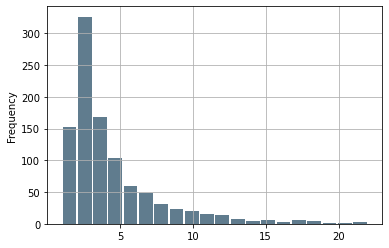

In [26]:
import pandas as pd
import matplotlib as plt
import numpy as np
cycle_count2 = np.array(cycle_count)
cycle_count3 = pd.Series(cycle_count)
    
cycle_count3.plot.hist(grid = True, bins= 20, rwidth = 0.9, color = '#607c8e')
#plt.title('Cycle count frequency')
#plt.xlabel('Number of Cycles a Game Lasts')
#plt.ylabel('Frequency')
#plt.grid(axis = 'y', alpha = 0.75)
#print(cycle_count2)